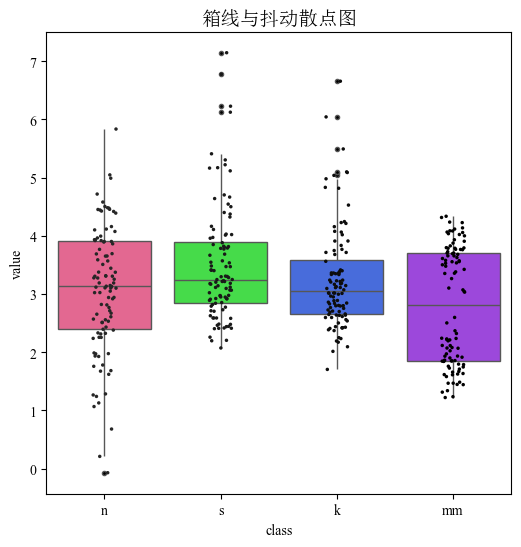

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#中文显示
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']
df=pd.read_csv('Distribution_Data.csv')
#颜色映射
colors=["#f8538a","#2df433","#2f60f4","#9f2ff4"]
fig, ax= plt.subplots(figsize=(6,6))
#绘制箱线图，设置异常点样式，隐藏顶端与末端线段
sns.boxplot(data=df, x="class", y="value", hue="class", flierprops={"marker": "o", "markerfacecolor": "black", "markersize": 3},
                capprops={"linewidth": 0},palette=colors)
#绘制抖动散点图，设置点的样式
sns.stripplot(data=df,x="class", y="value", hue="class",jitter=True,palette='dark:black',size=2.5)
ax.set_ylabel('value')
ax.set_title("箱线与抖动散点图", fontsize=14)
ax.yaxis.grid(False)



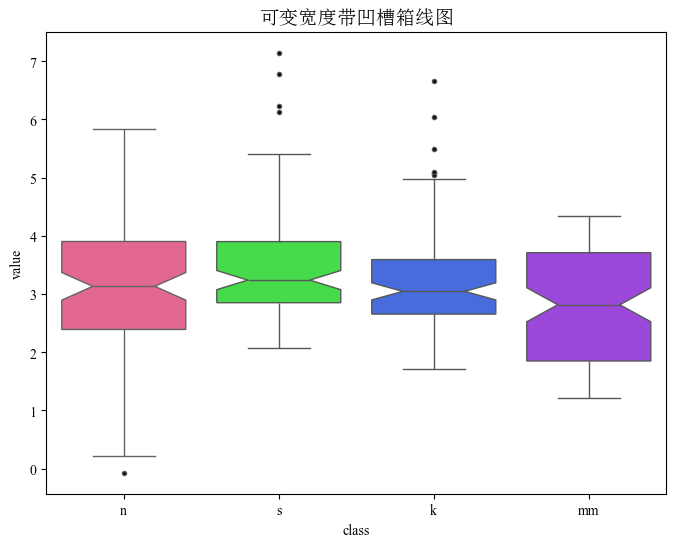

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 中文显示
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']

# 读取数据
df = pd.read_csv('Distribution_Data.csv')

# 定义颜色映射
colors = ["#f8538a", "#2df433", "#2f60f4", "#9f2ff4"]

# 计算每个类的数量和对应宽度，并按宽度升序排序
datacounts = df['class'].value_counts()
cwidths = datacounts / datacounts.max()  # 将每个类别的数量归一化到最大值的比例
widths = np.array(cwidths) * 0.8         # 将归一化比例乘以最大箱子宽度

# 对类别和宽度进行排序
sorted_indices = np.argsort(widths)
sorted_classes = datacounts.index[sorted_indices]
sorted_widths = widths[sorted_indices]

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制每个类别的箱线图，按宽度升序显示
for i, (category, width) in enumerate(zip(sorted_classes, sorted_widths)):
    subset = df[df['class'] == category]
    sns.boxplot(data=subset, x="class", y="value", color=colors[i % len(colors)], 
                width=width, flierprops={"marker": "o", "markerfacecolor": "black", "markersize": 3},
                notch=True, ax=ax)

# 设置标签和标题
ax.set_ylabel('value')
ax.set_title("可变宽度带凹槽箱线图", fontsize=14)
ax.yaxis.grid(False)

plt.show()


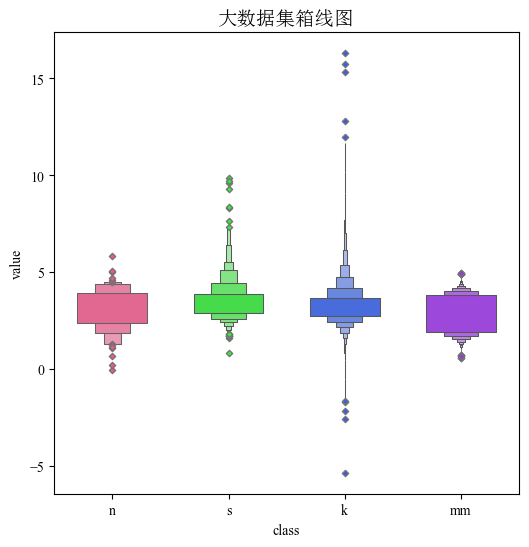

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 中文显示
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']

# 读取数据
df = pd.read_csv('Distribution_LargeData.csv')

# 颜色映射
colors = ["#f8538a", "#2df433", "#2f60f4", "#9f2ff4"]
fig, ax = plt.subplots(figsize=(6, 6))

# 获取所有类别
classes = df['class'].unique()

# 循环绘制每个类别的箱线图
for i, category in enumerate(classes):
    subset = df[df['class'] == category]
    sns.boxenplot(data=subset, x="class", y="value", color=colors[i % len(colors)],
                  flier_kws={"marker": "D", "facecolor":colors[i % len(colors)], "s": 10},
                  line_kws={"linewidth": 0},
                  ax=ax, width=0.6)

# 设置标签和标题
ax.set_ylabel('value')
ax.set_title("大数据集箱线图", fontsize=14)
ax.grid(False)  # 关闭所有网格线

# 显示图表
plt.show()


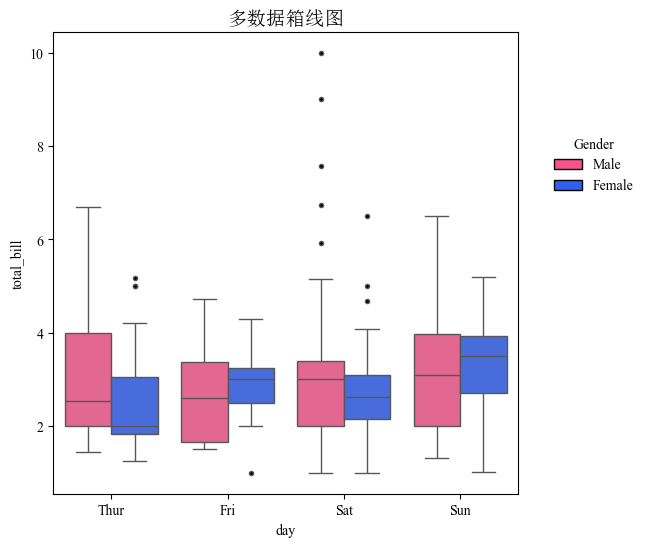

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
tips=sns.load_dataset('tips')
# 中文显示
plt.rcParams['font.family'] = ["Times New Roman", 'SimSun']
colors=["#f8538a","#2f60f4"]
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(
    x="day",
    y="tip", 
    data=tips,
    hue="sex",
    hue_order=["Male","Female"] , # 引入参数
    palette=colors,
    flierprops={"marker": "o", "markerfacecolor": "black", "markersize": 3}
)
ax.set_xlabel('day')
ax.set_ylabel('total_bill')
ax.set_title("多数据箱线图", fontsize=14)
ax.grid(False)  # 关闭所有网格线
# 自定义图例
legend_elements = [
    Patch(facecolor=colors[0], edgecolor='black', label='Male', hatch='-'),
    Patch(facecolor=colors[1], edgecolor='black', label='Female', hatch='-')
]

# 移动图例到表格外，并修改图例标题
ax.legend(handles=legend_elements,title="Gender", bbox_to_anchor=(1.05, 0.8), loc='upper left',frameon=False)
# 显示图表
plt.show()